# Stock Performance Tracker


In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [57]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# plt.style.use("fivethirtyeight")

user_name_l = ["ta", "tl"]
user_combined = "user_combined"
user_name_combined_l = user_name_l + [user_combined]

index_combined = "index_combined"
index_name_l = ["vni", "vn30"]
index_name_combined_l = index_name_l + [index_combined]


## Read data


### Log table


In [58]:
log_df = pd.read_csv("./stock_data - log.csv", index_col="date", parse_dates=True)
log_df = log_df.sort_index()
log_df.tail()


,ta,tl,vni,vn30
date,,,,
2022-01-17,170767673,399431676,1452.84,1478.61
2022-01-18,169639788,398695481,1438.94,1477.06
2022-01-19,170623200,399849051,1442.79,1482.55
2022-01-20,171867752,402077879,1465.30,1492.81
2022-01-21,171568151,402345708,1472.89,1502.16


In [59]:
assert log_df.index.inferred_type == "datetime64"
log_df.dtypes


ta        int64
tl        int64
vni     float64
vn30    float64
dtype: object

### NAV chart


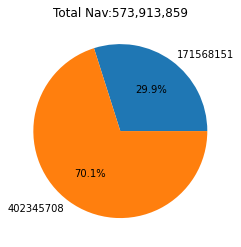

In [60]:
nav_l = [log_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
plt.pie(nav_l, labels=nav_l, autopct="%1.1f%%")

plt.title(f"Total Nav:{np.sum(nav_l):,}")
plt.show()


/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/4258284707.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([int(abs(tick) / 1_000_000) for tick in yticks])


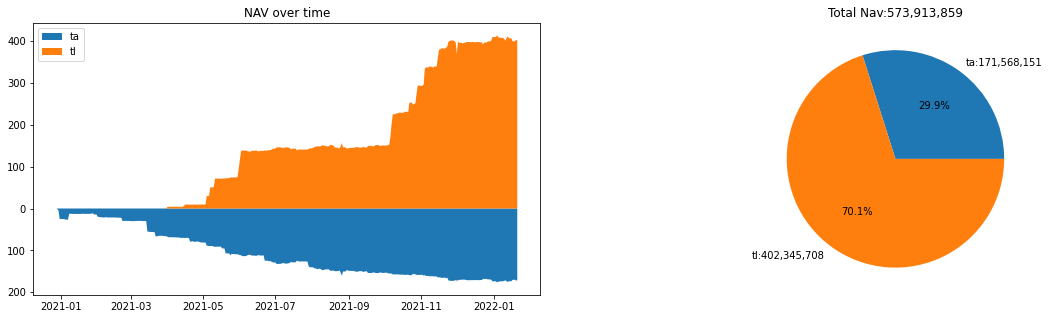

In [61]:
fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), ncols=2)  # type: ignore


# Line plot
for i, user_name in enumerate(user_name_l):
    sign = -1 if i % 2 == 0 else 1
    ax1.fill_between(log_df.index, sign * log_df[user_name], label=user_name)

# set labels to absolute values and with integer representation
yticks = ax1.get_yticks()
ax1.set_yticklabels([int(abs(tick) / 1_000_000) for tick in yticks])

ax1.set_title("NAV over time")
ax1.legend(loc="upper left")

# Pie chart
nav_l = [log_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
ax2.pie(nav_l, labels=label_l, autopct="%1.1f%%")

ax2.set_title(f"Total Nav:{np.sum(nav_l):,}")


plt.show()


### Plot time


/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/1838202483.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(log_df.index, log_df["vni"], label="vni", linestyle="-", marker=None)
/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/1838202483.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(log_df.index, log_df["vn30"], label="vn30", linestyle="-", marker=None)


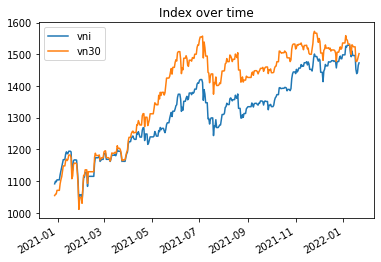

In [62]:
plt.plot_date(log_df.index, log_df["vni"], label="vni", linestyle="-", marker=None)
plt.plot_date(log_df.index, log_df["vn30"], label="vn30", linestyle="-", marker=None)

plt.title("Index over time")

plt.gcf().autofmt_xdate()
plt.legend()

plt.show()


### Cashflow


In [63]:
ta_cf_df = pd.read_csv(
    "./stock_data - ta_cashflow.csv",
    index_col="date",
    parse_dates=True,
)
tl_cf_df = pd.read_csv(
    "./stock_data - tl_cashflow.csv",
    index_col="date",
    parse_dates=True,
)
cf_df = pd.concat([ta_cf_df, tl_cf_df], axis=1)
assert cf_df.index.inferred_type == "datetime64"
cf_df.fillna(0, inplace=True)
cf_df


,ta_cashflow,tl_cashflow
date,,
2020-12-29,-1000000.0,0.0
2020-12-30,-4000000.0,0.0
2020-12-31,-20000000.0,0.0
2021-01-05,-1100000.0,0.0
2021-01-08,14000000.0,0.0
2021-01-29,-2500000.0,0.0
2021-02-01,-5300000.0,0.0
2021-02-22,-7900000.0,0.0
2021-03-15,-25000000.0,0.0


## Processing


### Adding diff columns


In [64]:
for name in user_name_l + index_name_l:
    log_df[f"{name}_diff"] = log_df[name].diff()
log_df.tail()


,ta,tl,vni,vn30,ta_diff,tl_diff,vni_diff,vn30_diff
date,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,-43.18,-44.96
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,-13.90,-1.55
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,3.85,5.49
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,22.51,10.26
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,7.59,9.35


### Remove unchanged dates from `log_df`


In [65]:
unchanged_filt = log_df[f"{user_name_l[0]}_diff"] == 0
log_df = log_df.loc[~unchanged_filt]
log_df.tail()


,ta,tl,vni,vn30,ta_diff,tl_diff,vni_diff,vn30_diff
date,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,-43.18,-44.96
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,-13.90,-1.55
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,3.85,5.49
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,22.51,10.26
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,7.59,9.35


### Compensating diff with cashflow


In [66]:
for user_name in user_name_l:
    log_df[f"{user_name}_diff"] = log_df[f"{user_name}_diff"].add(
        cf_df[f"{user_name}_cashflow"], fill_value=0
    )


### Adding Combined columns


In [67]:
# Diff for user
diff_user_column_name_l = [f"{user_name}_diff" for user_name in user_name_l]

log_df[user_combined] = log_df[user_name_l].sum(axis=1)
log_df[f"{user_combined}_diff"] = log_df[diff_user_column_name_l].sum(axis=1)

# Diff for index
diff_index_column_name_l = [f"{index_name}_diff" for index_name in index_name_l]

log_df[index_combined] = log_df[index_name_l].mean(axis=1)
log_df[f"{index_combined}_diff"] = log_df[diff_index_column_name_l].mean(axis=1)

log_df.tail()


,ta,tl,vni,vn30,ta_diff,tl_diff,vni_diff,vn30_diff,user_combined,user_combined_diff,index_combined,index_combined_diff
date,,,,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,-43.18,-44.96,570199349,-9897113.0,1465.725,-44.070
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,-13.90,-1.55,568335269,-1864080.0,1458.000,-7.725
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,3.85,5.49,570472251,2136982.0,1462.670,4.670
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,22.51,10.26,573945631,3473380.0,1479.055,16.385
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,7.59,9.35,573913859,-31772.0,1487.525,8.470


### Calculating diff percent & aux diff percent


In [68]:
for user_name in user_name_combined_l:

    log_df[f"{user_name}_diff_p"] = (
        log_df[f"{user_name}_diff"] / log_df[user_name].shift()
    )

    # Replace inf values with nan in diff_p (otherwise, growth would be infinite)
    log_df[f"{user_name}_diff_p"] = log_df[f"{user_name}_diff_p"].replace(
        [np.inf, -np.inf], np.nan
    )

    log_df[f"{user_name}_aux_diff_p"] = log_df[f"{user_name}_diff_p"] + 1

for index_name in index_name_combined_l:
    log_df[f"{index_name}_diff_p"] = (
        log_df[f"{index_name}_diff"] / log_df[index_name].shift()
    )

log_df.tail()


,ta,tl,vni,vn30,ta_diff,tl_diff,vni_diff,vn30_diff,user_combined,user_combined_diff,index_combined,index_combined_diff,ta_diff_p,ta_aux_diff_p,tl_diff_p,tl_aux_diff_p,user_combined_diff_p,user_combined_aux_diff_p,vni_diff_p,vn30_diff_p,index_combined_diff_p
date,,,,,,,,,,,,,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,-43.18,-44.96,570199349,-9897113.0,1465.725,-44.070,-0.016669,0.983331,-0.017229,0.982771,-0.017061,0.982939,-0.028863,-0.029510,-0.029189
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,-13.90,-1.55,568335269,-1864080.0,1458.000,-7.725,-0.006605,0.993395,-0.001843,0.998157,-0.003269,0.996731,-0.009567,-0.001048,-0.005270
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,3.85,5.49,570472251,2136982.0,1462.670,4.670,0.005797,1.005797,0.002893,1.002893,0.003760,1.003760,0.002676,0.003717,0.003203
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,22.51,10.26,573945631,3473380.0,1479.055,16.385,0.007294,1.007294,0.005574,1.005574,0.006089,1.006089,0.015602,0.006921,0.011202
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,7.59,9.35,573913859,-31772.0,1487.525,8.470,-0.001743,0.998257,0.000666,1.000666,-0.000055,0.999945,0.005180,0.006263,0.005727


### Diff percent histogram


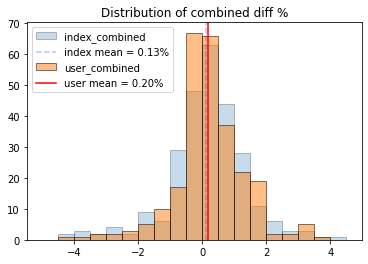

In [69]:
bins = np.arange(-5, 5, 0.5).tolist()

# Index histogram
plt.hist(
    log_df[f"{index_combined}_diff_p"] * 100,
    bins=bins,
    edgecolor="black",
    alpha=0.25,
    label=index_combined,
)
index_diff_p_mean = log_df[f"{index_combined}_diff_p"].mean() * 100  # type: ignore

plt.axvline(
    index_diff_p_mean,
    color="blue",
    linestyle="--",
    label="index mean = %.2f%%" % index_diff_p_mean,
    alpha=0.25,
)

# User histogram
plt.hist(
    log_df[f"{user_combined}_diff_p"] * 100,
    bins=bins,
    edgecolor="black",
    alpha=0.5,
    label=user_combined,
)
user_diff_p_mean = log_df[f"{user_combined}_diff_p"].mean() * 100  # type: ignore
plt.axvline(
    user_diff_p_mean,
    color="red",
    label="user mean = %.2f%%" % user_diff_p_mean,
)


plt.title("Distribution of combined diff %")
plt.legend()
plt.show()


### Diff percent scatter plot


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


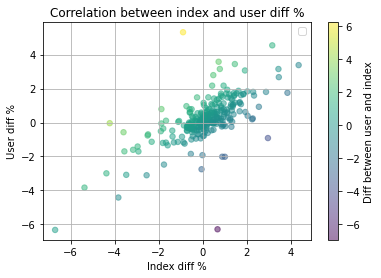

In [70]:
index_diff_p_l = log_df[f"{index_combined}_diff_p"] * 100
user_diff_p_l = log_df[f"{user_combined}_diff_p"] * 100
plt.scatter(
    index_diff_p_l,
    user_diff_p_l,
    c=user_diff_p_l - index_diff_p_l,  # type: ignore
    s=30,
    alpha=0.5,
)

cbar = plt.colorbar()
cbar.set_label("Diff between user and index")

plt.title("Correlation between index and user diff %")
plt.xlabel("Index diff %")
plt.ylabel("User diff %")

plt.legend()
plt.grid(True)
plt.show()


### Growth


In [71]:
def get_overall_growth_df(
    log_df: pd.DataFrame,
    anchor_date: str = "2020-12-29",
) -> pd.DataFrame:
    log_df = log_df[log_df.index >= anchor_date]  # type: ignore
    df = pd.DataFrame(index=log_df.index)
    for user_name in user_name_combined_l:
        # set first date aux_diff_p to 1
        log_df[f"{user_name}_aux_diff_p"].iloc[0] = 1  # type: ignore
        # calculate growth using cumulative product since anchor date
        df[user_name] = log_df[f"{user_name}_aux_diff_p"].cumprod()
    for index_name in index_name_combined_l:
        # calculate growth using proportion since anchor date
        df[index_name] = log_df[f"{index_name}"] / log_df[f"{index_name}"].iloc[0]  # type: ignore
    return df.fillna(1)  # type: ignore


### Plot growth time series


/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/3599096511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[f"{user_name}_aux_diff_p"].iloc[0] = 1  # type: ignore
/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/3599096511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[f"{user_name}_aux_diff_p"].iloc[0] = 1  # type: ignore
/var/folders/2s/x1r3gsqj0y14ztflmlggyqzm0000gn/T/ipykernel_12441/3599096511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

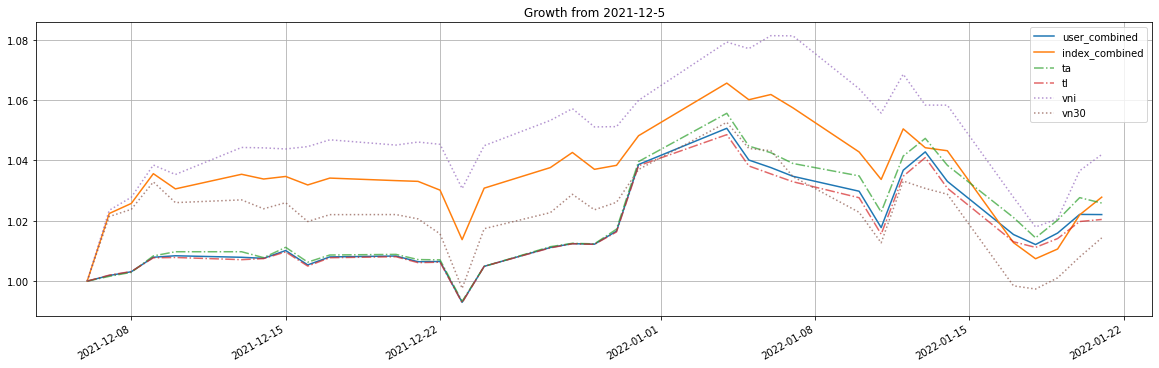

In [72]:
fig, ax = plt.subplots(figsize=(20, 6))

anchor_date = "2021-12-5"
growth_df = get_overall_growth_df(log_df, anchor_date=anchor_date)

for combined_name in [user_combined, index_combined]:
    ax.plot_date(
        growth_df.index,
        growth_df[combined_name],
        linestyle="-",
        marker=None,
        label=combined_name,
    )

for single_name in user_name_l:
    ax.plot_date(
        growth_df.index,
        growth_df[single_name],
        linestyle="-.",
        marker=None,
        alpha=0.7,
        label=single_name,
    )

for single_name in index_name_l:
    ax.plot_date(
        growth_df.index,
        growth_df[single_name],
        linestyle=":",
        marker=None,
        alpha=0.7,
        label=single_name,
    )


ax.set_title(f"Growth from {anchor_date}")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()


plt.show()


### Add period info


In [73]:
log_df["Y"] = log_df.index.to_period("Y")  # type: ignore
log_df["Q"] = log_df.index.to_period("Q")  # type: ignore
log_df["M"] = log_df.index.to_period("M")  # type: ignore
log_df.tail()


,ta,tl,vni,vn30,ta_diff,tl_diff,vni_diff,vn30_diff,user_combined,user_combined_diff,index_combined,index_combined_diff,ta_diff_p,ta_aux_diff_p,tl_diff_p,tl_aux_diff_p,user_combined_diff_p,user_combined_aux_diff_p,vni_diff_p,vn30_diff_p,index_combined_diff_p,Y,Q,M
date,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,-43.18,-44.96,570199349,-9897113.0,1465.725,-44.070,-0.016669,0.983331,-0.017229,0.982771,-0.017061,0.982939,-0.028863,-0.029510,-0.029189,2022,2022Q1,2022-01
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,-13.90,-1.55,568335269,-1864080.0,1458.000,-7.725,-0.006605,0.993395,-0.001843,0.998157,-0.003269,0.996731,-0.009567,-0.001048,-0.005270,2022,2022Q1,2022-01
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,3.85,5.49,570472251,2136982.0,1462.670,4.670,0.005797,1.005797,0.002893,1.002893,0.003760,1.003760,0.002676,0.003717,0.003203,2022,2022Q1,2022-01
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,22.51,10.26,573945631,3473380.0,1479.055,16.385,0.007294,1.007294,0.005574,1.005574,0.006089,1.006089,0.015602,0.006921,0.011202,2022,2022Q1,2022-01
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,7.59,9.35,573913859,-31772.0,1487.525,8.470,-0.001743,0.998257,0.000666,1.000666,-0.000055,0.999945,0.005180,0.006263,0.005727,2022,2022Q1,2022-01


In [74]:
def get_period_df(period_symbol, log_df):
    period_l = log_df[period_symbol].unique()

    data = []
    for period in period_l:
        period_data_dict = {"period": period}
        period_filt = log_df[period_symbol] == period
        period_df = log_df.loc[period_filt]

        for user_name in user_name_combined_l:
            period_growth = period_df[f"{user_name}_aux_diff_p"].product()  # type: ignore
            period_data_dict[f"{user_name}_growth"] = period_growth - 1  # type: ignore

        for index_name in index_name_combined_l:
            index_growth = (period_df[index_name].iloc[0] - period_df[index_name].iloc[-1]) / period_df[index_name].iloc[  # type: ignore
                0
            ]
            period_data_dict[f"{index_name}_growth"] = index_growth

        data.append(period_data_dict)

    period_df = pd.DataFrame(data)
    period_df = period_df.set_index("period")
    period_df.index = period_df.index.to_series().astype(str)
    return period_df


In [75]:
monthly_df = get_period_df("M", log_df)
monthly_df


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2020-12,-0.012086,0.000000,-0.012086,-0.011491,-0.015689,-0.013554
2021-01,-0.058015,0.000000,-0.058015,0.056994,0.039895,0.048555
2021-02,0.119198,0.000000,0.119198,-0.128400,-0.139572,-0.133971
2021-03,0.021305,0.000000,0.021305,-0.004443,-0.003700,-0.004071
2021-04,0.097828,0.005679,0.092651,-0.019151,-0.070236,-0.044799
2021-05,0.091439,0.118706,0.097430,-0.069111,-0.110502,-0.090498
2021-06,0.057973,0.065138,0.061576,-0.052901,-0.031074,-0.041426
2021-07,0.010179,0.004027,0.007063,0.075529,0.063366,0.069185
2021-08,0.008648,-0.002645,0.002953,-0.013126,0.013499,0.000833


In [81]:
def plot_growth(growth_df: pd.DataFrame, period_name: str):

    fig, ax = plt.subplots(figsize=(20, 6))

    # * Draw bar chart

    x_indices = np.arange(len(growth_df.index))

    bar_name_l = user_name_l + index_name_l
    bar_count = len(bar_name_l)
    total_width = 0.6
    bar_width = total_width / bar_count

    for i, name in enumerate(bar_name_l):
        position = x_indices + i * bar_width
        ax.bar(
            position,
            growth_df[f"{name}_growth"],
            label=name,
            width=bar_width,
        )

    # move back half bar width to left most edge and then move to the middle of the bar group
    ticks = x_indices - (0.5 * bar_width) + (bar_count / 2 * bar_width)

    # * Draw line chart

    for name in [user_combined, index_combined]:
        ax.plot(
            ticks,
            growth_df[f"{name}_growth"],
            label=name,
            linestyle="--",
        )

    ax.fill_between(
        ticks,
        growth_df[f"{user_combined}_growth"],
        growth_df[f"{index_combined}_growth"],
        where=(
            growth_df[f"{user_combined}_growth"]
            >= growth_df[f"{index_combined}_growth"]
        ),
        color="green",
        interpolate=True,
        alpha=0.25,
    )

    ax.fill_between(
        ticks,
        growth_df[f"{user_combined}_growth"],
        growth_df[f"{index_combined}_growth"],
        where=(
            growth_df[f"{user_combined}_growth"] < growth_df[f"{index_combined}_growth"]
        ),
        color="red",
        interpolate=True,
        alpha=0.25,
    )

    # * Decorations

    ax.set_xticks(
        ticks=ticks,
        labels=growth_df.index,
        rotation=90,
    )

    ax.set_title(f"{period_name} growth")
    ax.set_xlabel(period_name)
    ax.set_ylabel("Growth")
    ax.legend()

    ax.grid(True)

    plt.show()


## Monthly


In [82]:
monthly_df = get_period_df("M", log_df)
monthly_df.tail()


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2021-09,0.054943,0.052181,0.053573,-0.005552,-0.018795,-0.012395
2021-10,0.039672,0.062304,0.053041,-0.081939,-0.062781,-0.071991
2021-11,0.074182,0.066002,0.068667,-0.027429,-0.013740,-0.020405
2021-12,0.030456,0.029998,0.030117,-0.008814,0.009098,0.000333
2022-01,-0.013221,-0.017144,-0.015974,0.034538,0.036379,0.035468


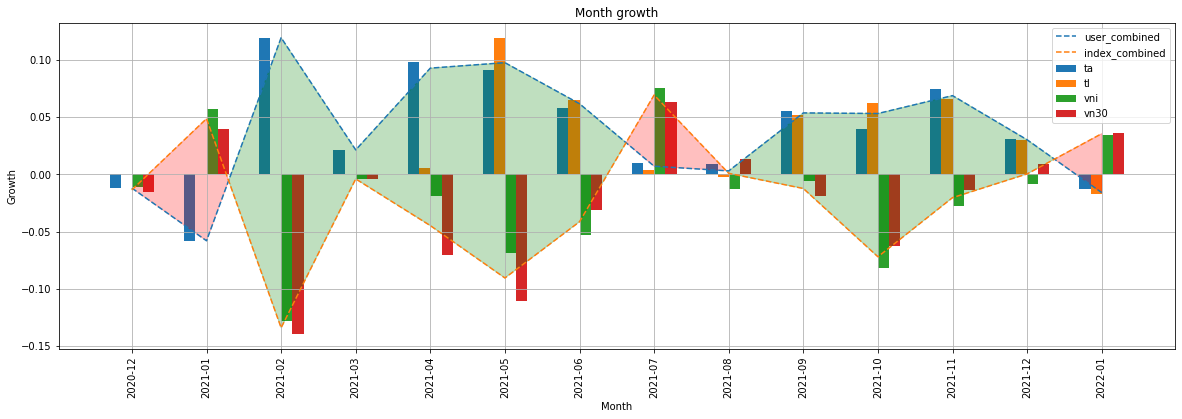

In [83]:
plot_growth(monthly_df, "Month")


## Quaterly


In [79]:
quaterly_df = get_period_df("Q", log_df)
quaterly_df.tail()


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2021Q1,0.076729,0.000000,0.076729,-0.063339,-0.095588,-0.079255
2021Q2,0.267676,0.198343,0.272944,-0.158252,-0.246982,-0.202800
2021Q3,0.074897,0.053624,0.064147,0.052940,0.059140,0.056174
2021Q4,0.150810,0.166388,0.159242,-0.122400,-0.065112,-0.092652
2022Q1,-0.013221,-0.017144,-0.015974,0.034538,0.036379,0.035468


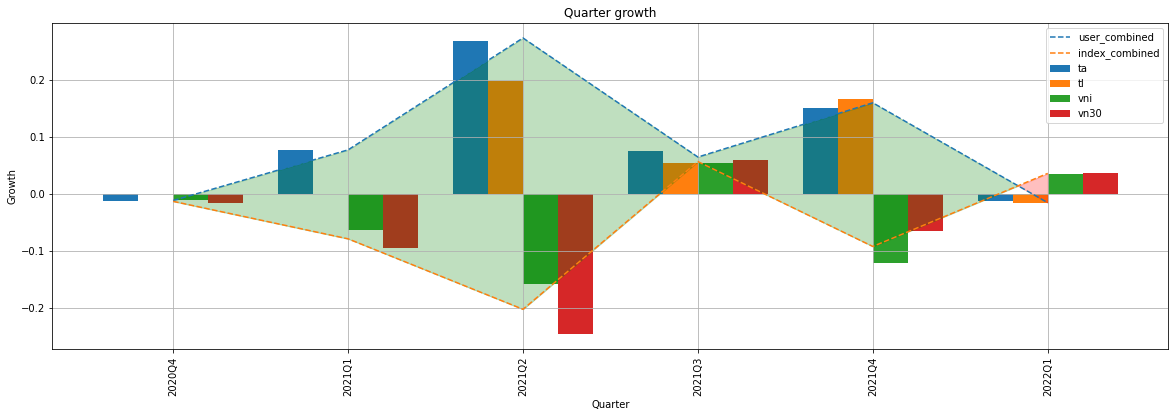

In [80]:
plot_growth(quaterly_df, "Quarter")
